# TP 2: La descente du Gradiant
### Groupe 3 | Groupe tp 15:
- Adda Redouane 
- Rahiche Messaoud 
- Krizou Amani 
- Mendil Yousra

## L'importationdes librairies:

In [26]:
import numpy as np
import matplotlib.pyplot as plt

## L'importatopn des donnes:

In [27]:
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)

In [28]:
intercept=np.ones((data.shape[0],1))
X = np.column_stack((intercept,data[:,0]))
y = data[:,1]
print(len(X), len(y))

97 97


Text(0, 0.5, 'Bénéfice x1000')

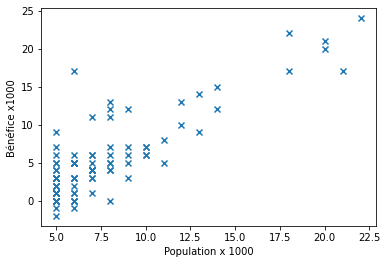

In [29]:
plt.scatter(X[:,1],y,marker='x')
plt.xlabel('Population x 1000')
plt.ylabel('Bénéfice x1000')

## Descente du Gradient : Préparation des fonctions

### 1- Calcul du coût:

#### 1.1 La fonction hypothese:

In [30]:
def h(x, theta):
    return (theta[0] + theta[1]*x)

In [31]:
# on a pas bien implemeter cette fonction car elle nous donne des fausses resultats,
# par contre la fonction sans vectorisation (computeCost()) marche correctement.
def computeCostVect(X, y, theta):
    m = len(y)
    error = np.dot(X,theta)
    cost =  np.sum((1/(2*m)) *(error - y)**2)
    return cost;

In [32]:
def computeCost(X, y, theta):
    m = len(y)
    hypos = []
    # predictions :
    for i in range(m):
        hypos.append(h(X[i,1],theta))
    
    # calculating error:
    error = 0
    for i in range(m):
        error += (hypos[i] - y[i])**2
    
    cost = error/(2*m)
    return cost

In [79]:
# print(y.shape)
theta = np.ones((2, 1))
cost = computeCost(X,y,theta)
cost2 = computeCostVect(X,y,theta)
print(cost)
print(cost2)

[10.05154639]
2665.8556701030925


In [80]:
def gradientDescent(X, y, theta, alpha, iterations):
    
    cost_hist = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    m = len(X)
    theta0 = theta[0]
    theta1 = theta[1]
    for k in range(iterations):
        t0_gradient = 0
        t1_gradient = 0
        for i in range(m):
            x = X[i,1]
            Y = y[i]

            t1_gradient += (1/m) * x * ((theta0+theta1*x) - Y) 
            t0_gradient += (1/m) * ((theta0+theta1*x) - Y) 


        theta0 = theta0 - t0_gradient * alpha
        theta1 = theta1 - t1_gradient * alpha
        cost_hist[k] = computeCost(X,y,[theta0,theta1])
        theta_history[k,:] = [theta0,theta1]

    return theta0,theta1, cost_hist,theta_history

## Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [86]:
theta = np.random.randn(2, 1)

Calculer le cout initial

In [87]:
initialCost=computeCost(X, y, theta)
print(initialCost)

[7.31866829]


Appel des la fonction de calcul du gradient

In [88]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta0,theta1,costs,thetas = gradientDescent(X, y, theta, alpha, iterations);

C:\Users\user\AppData\Local\Temp\ipykernel_13868\1796353717.py:22: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  theta_history[k,:] = [theta0,theta1]


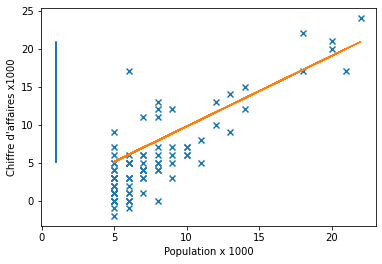

In [89]:
y_pred=np.matmul(X,theta)
plt.scatter(X[:,1],y,marker ='x')
plt.xlabel('Population x 1000')
plt.ylabel('Chiffre d\'affaires x1000')
plt.plot(X,y_pred)

Traçage du coût en fonction de theta0 et theta1

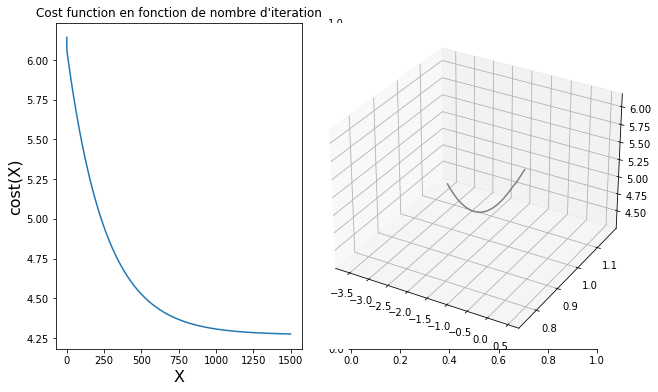

In [90]:

plt.figure(figsize=[15,6])

plt.subplot(1,3,1)

plt.title('Cost function en fonction de nombre d\'iteration')
plt.xlabel('X',fontsize=16)
plt.ylabel('cost(X)',fontsize=16)
plt.plot(list(range(iterations)), costs)


plt.subplot(1,3,2)
ax = plt.axes(projection='3d')
ax.plot3D(thetas[:,0], thetas[:,1], costs, 'gray')
# plt.subplot(1,3,2)
# plt.title('Cost function en fonction theta 0')
# plt.xlabel('Theta 0',fontsize=16)
# plt.ylabel('cost(X)',fontsize=16)
# plt.plot(thetas[:,0],costs)


# plt.subplot(1,3,3)
# plt.title('Cost function en fonction theta 1')
# plt.xlabel('Theta 1',fontsize=16)
# plt.ylabel('cost(X)',fontsize=16)
# plt.plot(thetas[:,1],costs)

plt.show()

## Prédiction des valeurs de y

In [91]:
# Predire pour une opulation = 35,000 et 70,000
predict1 = np.matmul([1, 3.5],[theta0,theta1]);
print(predict1)

predict2 = np.matmul([1, 7.0],[theta0,theta1]);
print(predict2)

[0.5121953]
[4.60329592]


# Régression linéaire à plusieurs variables

importation des donnees

In [92]:
dataMulti = np.genfromtxt('dataMulti.csv', delimiter=',', dtype=int)
dataMulti.shape

(47, 3)

In [93]:
intercept_m=np.ones((dataMulti.shape[0],1))
X1_m = np.column_stack((intercept_m,dataMulti[:,0]))
X2_m = np.column_stack((intercept_m,dataMulti[:,1]))
y_m = dataMulti[:,2]

## Redefinition de la fonctions de cout

### La fonction Hypothese multivariable

In [94]:
def h_m(x1,x2, theta):
    return (theta[0] + theta[1]*x1 + theta[2]*x2)

In [95]:
def computeCost_m(X1, X2, y, theta):
    m = len(y)
    hypos = []
    # predictions :
    for i in range(m):
        hypos.append(h_m(X1[i,1],X2[i,1],theta))
    
    # calculating error:
    error = 0
    for i in range(m):
        error += (hypos[i] - y[i])**2
    
    cost = error/(2*m)
    return cost

In [96]:
def gradientDescent_m(X1,X2, y, theta, alpha, iterations):
    
    cost_hist = np.zeros(iterations)
    theta_history = np.zeros((iterations,3))
    m = len(y)
    theta0 = theta[0]
    theta1 = theta[1]
    theta2 = theta[2]
    for k in range(iterations):
        t0_gradient = 0
        t1_gradient = 0
        t2_gradient = 0
        for i in range(m):
            x1 = X1[i,1]
            x2 = X2[i,1]
            Y = y[i]

            t2_gradient += (1/m) * x2 * ((theta0+theta1*x1 + theta2*x2) - Y) 
            t1_gradient += (1/m) * x1 * ((theta0+theta1*x1 + theta2*x2) - Y) 
            t0_gradient += (1/m) * ((theta0+theta1*x1 + theta2*x2) - Y) 


        theta0 = theta0 - t0_gradient * alpha
        theta1 = theta1 - t1_gradient * alpha
        theta2 = theta2 - t2_gradient * alpha
        cost_hist[k] = computeCost(X,y,[theta0,theta1,theta2])
        theta_history[k,:] = [theta0,theta1,theta2]

    return theta0,theta1, theta2, cost_hist,theta_history

Mise à l'échelle des données

In [97]:
# i think this is normalization:
X1_me = (X1_m - np.min(X1_m)) / np.ptp(X1_m) 
X1_me[:,0] += 1
X2_me = (X2_m - np.min(X2_m)) / np.ptp(X2_m) 
X2_me[:,0] += 1


In [98]:
theta_m = np.random.randn(3, 1)
theta_m

array([[-1.53406342],
       [-1.24382517],
       [ 0.28307402]])

Calculer le cout initial

In [99]:
initialCost_m=computeCost_m(X1_me,X2_me, y_m, theta_m)
print(initialCost_m)

[6.5592265e+10]


Appel des la fonction de calcul du gradient

In [100]:
# paramètres
iterations = 1500;
alpha = 0.01;
# Appel
theta0_m,theta1_m,theta3_m,costs_m,thetas_m = gradientDescent_m(X1_me,X2_me, y_m, theta_m, alpha, iterations);

C:\Users\user\AppData\Local\Temp\ipykernel_13868\317652877.py:27: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  theta_history[k,:] = [theta0,theta1,theta2]


# Vérification de l'implementation
Compareson de nos algorithmes à ceux de scikitlearn

In [101]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(f'sklearn : Theta 0 = {reg.intercept_} theta 1 = {reg.coef_}')
print(f'Nos resultat : Theta0 = {theta0} theta 1 = {theta1}')

0.7088652601000887
sklearn : Theta 0 = -3.8087580729621298 theta 1 = [0.         1.19285652]
Nos resultat : Theta0 = [-3.57890532] theta 1 = [1.16888589]


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

- Dans notre cas, on a cree la fonction de calcule de coutssans vectorisarion qi va etre lours si la dataset est grande, doncpour ameliorer notre apprentissage on doit utiliser la vectorisaion.
- Le learning rate: sa serait mieux si en change le learning rate jusa'on trouve le learning rate qui rend notre descent du graaaaaient plus rapide 